https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

# %config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [3]:
all_data = pd.concat((train.loc[:,'Pclass':'Embarked'],
                      test.loc[:,'Pclass':'Embarked']))

all_data.head()

Pclass     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0       3    male  22.0      1      0         A/5 21171   7.2500   NaN   
1       1  female  38.0      1      0          PC 17599  71.2833   C85   
2       3  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3       1  female  35.0      1      0            113803  53.1000  C123   
4       3    male  35.0      0      0            373450   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb793402b00>,
      dtype=object)

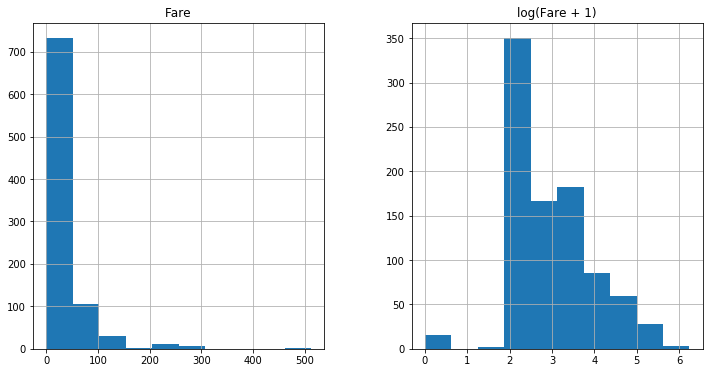

In [4]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Fare":train["Fare"], "log(Fare + 1)":np.log1p(train["Fare"])})
prices.hist()

In [5]:
#log transform the target:
#train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log(all_data[skewed_feats]+1)
all_data.head()

Pclass     Sex   Age     SibSp  Parch            Ticket      Fare Cabin  \
0       3    male  22.0  0.693147    0.0         A/5 21171  2.110213   NaN   
1       1  female  38.0  0.693147    0.0          PC 17599  4.280593   C85   
2       3  female  26.0  0.000000    0.0  STON/O2. 3101282  2.188856   NaN   
3       1  female  35.0  0.693147    0.0            113803  3.990834  C123   
4       3    male  35.0  0.000000    0.0            373450  2.202765   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [6]:
all_data = pd.get_dummies(all_data)

In [29]:
all_data

Pclass        Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
0         3  22.000000  0.693147  0.000000  2.110213           0         1   
1         1  38.000000  0.693147  0.000000  4.280593           1         0   
2         3  26.000000  0.000000  0.000000  2.188856           1         0   
3         1  35.000000  0.693147  0.000000  3.990834           1         0   
4         3  35.000000  0.000000  0.000000  2.202765           0         1   
5         3  29.881138  0.000000  0.000000  2.246893           0         1   
6         1  54.000000  0.000000  0.000000  3.967694           0         1   
7         3   2.000000  1.386294  0.693147  3.094446           0         1   
8         3  27.000000  0.000000  1.098612  2.495954           1         0   
9         2  14.000000  0.693147  0.000000  3.436268           1         0   
10        3   4.000000  0.693147  0.693147  2.873565           1         0   
11        1  58.000000  0.000000  0.000000  3.316003           1         0   
12        3  20.000000  0.000000  0.000000  2.202765           0         1   
13        3  39.000000  0.693147  1.791759  3.474293           0         1   
14        3  14.000000  0.000000  0.000000  2.180892           1         0   
15        2  55.000000  0.000000  0.000000  2.833213           1         0   
16        3   2.000000  1.609438  0.693147  3.405355           0         1   
17        2  29.881138  0.000000  0.000000  2.639057           0         1   
18        3  31.000000  0.693147  0.000000  2.944439           1         0   
19        3  29.881138  0.000000  0.000000  2.107178           1         0   
20        2  35.000000  0.000000  0.000000  3.295837           0         1   
21        2  34.000000  0.000000  0.000000  2.639057           0         1   
22        3  15.000000  0.000000  0.000000  2.200464           1         0   
23        1  28.000000  0.000000  0.000000  3.597312           0         1   
24        3   8.000000  1.386294  0.693147  3.094446           1         0   
25        3  38.000000  0.693147  1.791759  3.477773           1         0   
26        3  29.881138  0.000000  0.000000  2.107178           0         1   
27        1  19.000000  1.386294  1.098612  5.575949           0         1   
28        3  29.881138  0.000000  0.000000  2.183711           1         0   
29        3  29.881138  0.000000  0.000000  2.185579           0         1   
..      ...        ...       ...       ...       ...         ...       ...   
388       3  21.000000  0.000000  0.000000  2.169054           0         1   
389       3   6.000000  1.386294  0.693147  3.094446           0         1   
390       1  23.000000  0.000000  0.000000  4.548600           0         1   
391       1  51.000000  0.000000  0.693147  3.698830           1         0   
392       3  13.000000  0.000000  1.098612  3.056357           0         1   
393       2  47.000000  0.000000  0.000000  2.442347           0         1   
394       3  29.000000  1.386294  0.693147  3.136581           0         1   
395       1  18.000000  0.693147  0.000000  4.110874           1         0   
396       3  24.000000  0.000000  0.000000  2.110213           0         1   
397       1  48.000000  0.693147  0.693147  4.384524           1         0   
398       3  22.000000  0.000000  0.000000  2.171907           0         1   
399       3  31.000000  0.000000  0.000000  2.167143           0         1   
400       1  30.000000  0.000000  0.000000  5.111184           1         0   
401       2  38.000000  0.693147  0.000000  3.091042           0         1   
402       1  22.000000  0.000000  0.693147  4.100989           1         0   
403       1  17.000000  0.000000  0.000000  3.873282           0         1   
404       1  43.000000  0.693147  0.000000  3.357622           0         1   
405       2  20.000000  0.000000  0.000000  2.698841           0         1   
406       2  23.000000  0.693147  0.000000  2.442347           0         1   
407       1  50.000000  0.6

In [7]:
all_data = all_data.fillna(all_data.mean())

In [8]:
train.shape

(891, 11)

In [9]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Survived
#print(y)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y)

accuracy = round(logreg.score(X_train, y) * 100, 2)

print(accuracy)

logreg_preds = logreg.predict(X_test)
logreg_preds

89.11


/home/matheus.nunes/Softwares/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
logreg_preds_train = logreg.predict(X_train)

In [14]:
lista = list(zip(y, logreg_preds_train))
lista

acertos = 0
total = 0
for linha in lista:
    if linha[0] == linha[1]:
        acertos += 1
    total += 1
    
acuracia = acertos / total
print("total: " + str(total))
print("acertos: " + str(acertos))
print("acuracia: " + str(acuracia) + "%")

total: 891
acertos: 794
acuracia: 0.8911335578002245%


In [15]:
# Calculando a acuracia pela matriz de confusão
yhat_matrix = confusion_matrix(y, logreg_preds_train)
print(yhat_matrix)

print("total: " + str(yhat_matrix.sum()))
print("acertos: " + str(yhat_matrix[0][0] + yhat_matrix[1][1]))
acc = (yhat_matrix[0][0] + yhat_matrix[1][1]) / yhat_matrix.sum()
print("acuracia: " + str(acc) + "%")

[[516  33]
 [ 64 278]]
total: 891
acertos: 794
acuracia: 0.8911335578002245%


In [16]:
y[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [17]:
prob = logreg.predict_proba(X_train)

df_prob = pd.DataFrame(prob, columns=['prob_morrer', 'prob_viver'])

df_prob = pd.concat([df_prob.reset_index(),
                     pd.DataFrame(y).reset_index(),
                     pd.DataFrame(logreg_preds_train, columns=['predito']).reset_index()],
                    axis=1)

df_prob = df_prob.rename({'Survived': 'Real'}, axis=1)
del df_prob['index']
df_prob.head()

prob_morrer  prob_viver  Real  predito
0     0.929442    0.070558     0        0
1     0.067197    0.932803     1        1
2     0.315709    0.684291     1        1
3     0.139597    0.860403     1        1
4     0.932044    0.067956     0        0

In [18]:
df_prob[df_prob.Real==1].sort_values(by=['prob_viver']).head()

prob_morrer  prob_viver  Real  predito
271     0.914230    0.085770     1        0
338     0.883405    0.116595     1        0
414     0.880568    0.119432     1        0
400     0.862629    0.137371     1        0
570     0.852580    0.147420     1        0

In [19]:
logreg.predict_proba(X_train)[:10,1]

array([0.07055841, 0.93280299, 0.68429086, 0.86040318, 0.06795557,
       0.10775506, 0.21077586, 0.04502981, 0.79271468, 0.89006179])

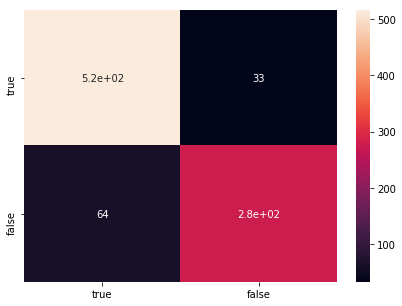

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(yhat_matrix, index = [i for i in ['true','false']],
                  columns = [i for i in ['true','false']])

plt.figure(figsize = (7,5))
sn.heatmap(df_cm, annot=True)

In [21]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()
    
fpr, tpr, _ = roc_curve(y, df_prob['prob_viver'])
roc_auc = auc(fpr, tpr)

No handles with labels found to put in legend.


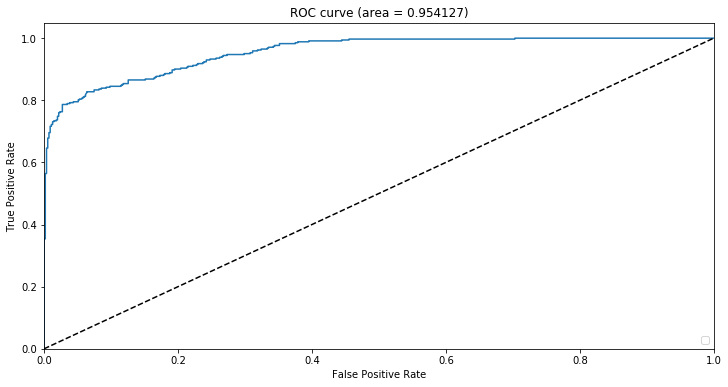

In [24]:
plot_roc(fpr, tpr, roc_auc)

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y)

random_forest_preds = random_forest.predict(X_test)

random_forest.score(X_train, y)
accuracy = round(random_forest.score(X_train, y) * 100, 2)
print(accuracy)

99.89


In [26]:
random_forest.predict_proba(X_train)[:10]

array([[0.97, 0.03],
       [0.02, 0.98],
       [0.25, 0.75],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.87, 0.13],
       [0.11, 0.89],
       [0.09, 0.91]])

In [27]:
#Random forest submission
solution = pd.DataFrame({"PassengerId":test.PassengerId,
                         "Survived":random_forest_preds})

solution.to_csv("random_forest_solution.csv", index = False)

In [28]:
solution

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]